In [1]:
%%capture
import __init__ as CFC

import math
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy.optimize import root_scalar, root

## 11.1

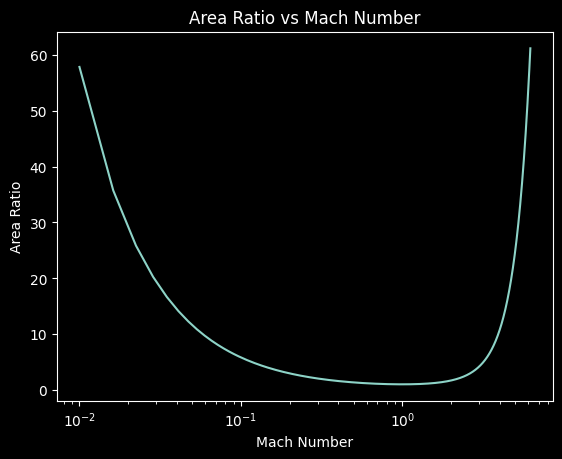

In [2]:
machs = np.linspace(0.01, 6.2, 1000)

ars = [CFC.ar_explicit(1.4, mach) for mach in machs]

plt.plot(machs, ars)
plt.xscale('log')
plt.title('Area Ratio vs Mach Number')
plt.xlabel('Mach Number')
plt.ylabel('Area Ratio')
plt.show()

## 11.2

### 11.2 a)

* $\dot m$ is constant by mass conservation
* $\gamma$ & $R$ are constants for a perfect gas
* and $T_0$ is constant for adiabatic flow, such as across a normal shock

Therefore, $p_0A^* = \text{constant}$

### 11.2 b)

In [3]:
gamma = 1.4
exit_to_throat_area_ratio = 6.5

ar = CFC.AreaRatio(gamma, area_ratio=exit_to_throat_area_ratio, super_sonic=False)
ar

Mach: 0.089460
Area Ratio:  6.500000

In [4]:
isen = CFC.IsentropicRatio(gamma, mach=ar.mach)
isen

Pressure Ratio: 1.00561
Temp Ratio: 1.00160
Density Ratio: 1.00401

In [9]:
print(f"Exit Mach: {ar.mach:.5f}")
print(f"P_pe / P_0: {1 / isen.pressure_ratio:.5f}")
print(f"T_te / T_0: {1 / isen.temp_ratio:.5f}")

Exit Mach: 0.08946
P_pe / P_0: 0.99442
T_te / T_0: 0.99840


### 11.2 c)

In [6]:
exit_over_inlet = 0.3

ar_super = CFC.AreaRatio(gamma, area_ratio=exit_to_throat_area_ratio, super_sonic=True)
ar_super

Mach: 3.453285
Area Ratio:  6.500000

In [10]:
exit_shock = CFC.NormalShockRatio(gamma, mach=ar_super.mach)
exit_shock

Pressure Ratio: 13.74604
Temp Ratio: 3.25158
Density Ratio: 4.22749
Stag Ratio: 0.22174
Exit Stag Ratio: 15.82403
Mach 2: 0.45300

In [15]:
# PE / P1 / (P01 / P1) = PE / P01
exit_shock_press_ratio = exit_shock.pressure_ratio / CFC.IsentropicRatio(gamma, mach=ar_super.mach).pressure_ratio
exit_shock_press_ratio

0.1926222563600863

In [17]:
print(f"Exit Mach: {exit_shock.mach_two:.5f}")
print(f"P_pe / P_0: {exit_shock_press_ratio:.5f}")

Exit Mach: 0.45300
P_pe / P_0: 0.19262


In [20]:
def between(bounds, val):
    small = min(bounds)
    large = max(bounds)
    
    return small <= val <= large
  
assert(between((1 / isen.pressure_ratio, exit_shock_press_ratio), exit_over_inlet))

### 11.2 d)

$P_{0, 1} A_t = P_{0, 2} A_2^*$

$\frac{A_t}{A_2^*} = \frac{P_{0, 2}}{P_{0, 1}}$

$\frac{A_e}{A_2^*} = \frac{A_e}{A_t} \frac{A_t}{A_2^*} = \frac{A_e}{A_t} \frac{P_{0, 2}}{P_{0, 1}}$

$\frac{A_e}{A_2^*} = A_{ratio} (\gamma, M_3)$

### 11.2 e)

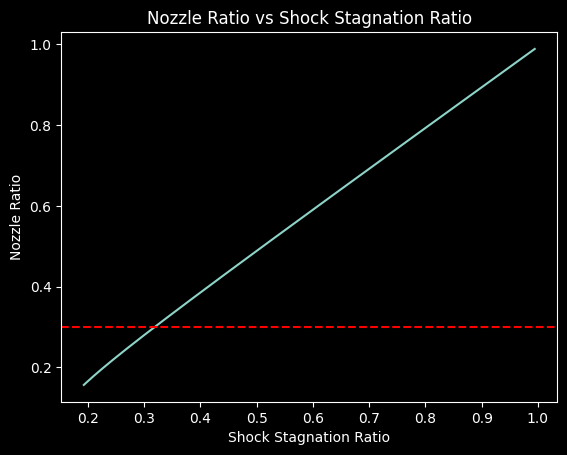

Shock Stagnation Ratio: 0.31858


In [45]:
def nozzle_ratio(exit_over_throat, shock_stag_ratio):
    exit_over_two_star = exit_over_throat * shock_stag_ratio
    mach_three = CFC.AreaRatio(gamma, area_ratio=exit_over_two_star, super_sonic=False).mach
    
    exit_over_post_shock_stag = 1 / CFC.IsentropicRatio(gamma, mach=mach_three).pressure_ratio
    
    return exit_over_post_shock_stag * shock_stag_ratio
  
ratios = np.linspace(1 / isen.pressure_ratio, exit_shock_press_ratio, 1000)
nozzle_ratios = [nozzle_ratio(exit_to_throat_area_ratio, ratio) for ratio in ratios]

plt.plot(ratios, nozzle_ratios)
plt.axhline(y=exit_over_inlet, color='r', linestyle='--')
plt.title('Nozzle Ratio vs Shock Stagnation Ratio')
plt.xlabel('Shock Stagnation Ratio')
plt.ylabel('Nozzle Ratio')
plt.show()

shock_stag_ratio = root_scalar( lambda x: nozzle_ratio(exit_to_throat_area_ratio, x) - exit_over_inlet,
                                bracket=(1 / isen.pressure_ratio, exit_shock_press_ratio)).root
print(f"Shock Stagnation Ratio: {shock_stag_ratio:.5f}")

### 11.2 f)

In [46]:
mach_one = root_scalar(lambda mach: CFC.NormalShockRatio(gamma, mach=mach).stag_ratio - shock_stag_ratio, bracket=(1, 10)).root
print(f"Pre-Shock Mach: {mach_one:.5f}")

Pre-Shock Mach: 3.03507


### 11.2 g)

In [47]:
shock_area_ratio = CFC.AreaRatio(gamma, mach=mach_one).area_ratio
print(f"Shock Area Ratio: {shock_area_ratio:.5f}")

Shock Area Ratio: 4.37834
